In [7]:
import pickle

with open('problem_batch_132112.pkl', "rb") as f:
    batch = pickle.load(f)

print(batch.keys())

dict_keys(['teacher_forcing', 'hidden', 'z', 'mu', 'log_var', 'std', 'type_noise_level', 'type_noise', 'noisy_ratios', 'pred_composition_per_crystal', 'pred_composition_ratio'])


In [11]:
batch['std'].shape

torch.Size([32, 256])

In [32]:
import torch
import numpy as np

# Check if there are any zeros in log_var
# Check if there are any zeros in the tensor
tensor = batch["z"]
has_zeros = (tensor == np.inf).any()

print("Are there any zeros in the tensor?", has_zeros)

# Find the indices of zeros
if has_zeros:
    zero_indices = torch.nonzero(tensor == np.inf, as_tuple=True)
    print("Indices of zeros:", zero_indices)

Are there any zeros in the tensor? tensor(True, device='cuda:0')
Indices of zeros: (tensor([19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19,
        19, 19, 19, 19, 19, 19, 19, 19, 19, 21, 21, 21, 21, 21, 21, 21, 21, 21,
        21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21],
       device='cuda:0'), tensor([ 38,  43,  62,  63,  64,  78,  85,  86, 113, 135, 142, 144, 162, 175,
        186, 194, 204, 211, 219, 228, 229, 231, 234, 239, 240, 242, 244,   0,
         16,  17,  60,  85,  86,  92, 109, 113, 115, 153, 155, 175, 182, 195,
        198, 211, 219, 223, 229, 231, 240, 242, 249, 253], device='cuda:0'))


In [34]:
batch["log_var"][21]


tensor([ 6.5605e+02,  2.1375e+01, -3.1379e+02, -5.3420e+01, -1.2138e+03,
        -9.8079e+02, -7.1995e+02, -6.4007e+02, -4.5821e+02, -4.0898e+02,
         8.9245e+00, -5.5425e+01,  4.8536e+01, -4.9563e+02, -4.8604e+02,
        -3.7884e+02,  3.7577e+02,  3.0189e+02, -1.4457e+02, -3.7314e+02,
        -1.6017e+02, -2.5945e+02, -6.2356e+02, -2.0858e+02,  8.7755e+01,
        -6.9936e+02, -2.9865e+02, -7.5687e+02, -7.6795e+02, -1.3268e+02,
        -1.0647e+03, -6.7713e+02, -1.3854e+02, -5.9877e+02, -6.2420e+02,
        -6.6241e+02, -8.6999e+01, -5.7940e+03,  2.5870e+02, -1.4873e+02,
         3.3919e+02, -6.2750e+02, -6.2369e+02,  1.9488e+02, -4.9541e+01,
        -6.0061e+02, -7.1275e+02, -1.6107e+02, -8.2685e+02, -6.2358e+01,
         7.5179e+01, -4.4232e+01, -1.3392e+02, -6.0334e+02, -7.9730e+02,
        -4.9047e+02, -7.2461e+01, -5.8760e+02,  8.3626e+01, -1.7162e+02,
         4.7503e+02,  1.6073e+02,  3.7450e+02,  2.6665e+02,  7.3179e+02,
         3.0480e+00, -6.6113e+02, -1.8629e+02, -3.6

# Manually calculate the reperametrization to debug

In [42]:
std = torch.exp(0.5 * batch["log_var"])
print(std[21])

tensor([       inf, 4.3814e+04, 0.0000e+00, 2.5115e-12, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 8.6683e+01, 9.2178e-13,
        3.4630e+10, 0.0000e+00, 0.0000e+00, 0.0000e+00,        inf,        inf,
        4.0375e-32, 0.0000e+00, 1.6546e-35, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        1.1369e+19, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.5476e-29,
        0.0000e+00, 0.0000e+00, 8.2682e-31, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        1.2834e-19, 0.0000e+00,        inf, 5.0554e-33,        inf, 0.0000e+00,
        0.0000e+00,        inf, 1.7469e-11, 0.0000e+00, 0.0000e+00, 1.0571e-35,
        0.0000e+00, 2.8780e-14, 2.1135e+16, 2.4837e-10, 8.2974e-30, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 1.8421e-16, 0.0000e+00, 1.4426e+18, 5.4215e-38,
               inf, 7.9899e+34,        inf,        inf,        inf, 4.5906e+00,
        0.0000e+00, 3.5344e-41, 0.0000e+00, 6.0985e-18, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 1.5784e-23, 1.0198e-

In [50]:
infs = torch.isinf(std)
inf_vars = batch["hidden"][infs]

inf_vars
# Add 1.0e-5 to std to avoid numerical issues
# std = std + 1.0e-5

tensor([ 129.0967,  230.9128,   48.6249, -178.0161,   54.1289,  -95.5015,
          85.7649, -294.9868, -456.7326, -369.7369,   33.6901, -176.3946,
         -37.1628,  129.8844,   -5.3824,  125.3446,   31.2599,  292.0277,
        -119.1616,   15.5657,    6.1816, -326.8035,  -56.0833,  453.3897,
        -312.9032,  -26.9069, -169.9389,  125.3056,   86.7557,  113.5637,
         247.3035,  143.8527,   35.5910,  109.9781,  604.1691,   60.7594,
         219.4354,   64.4354,   58.4128, -107.6946, -551.6886,  -97.2904,
        -284.3695,  180.4452,  109.9418,  373.6216,    5.3577, -399.7304,
        -134.6598,  502.4964,  118.2911,  210.9796,   44.4203, -163.8744,
          49.6532,  -88.1873,   78.8175, -271.0478, -420.7742, -338.7654,
          29.6307, -162.5306,  -33.6047,  119.5128,   -4.6132,  113.9180,
          28.9446,  267.9477, -110.0018,   13.6904,    5.7687, -300.0675,
         -52.0714,  416.1980, -288.2949,  -23.9851,  115.9351,   78.7653,
         104.6490,  132.0693,   31.501

In [38]:
print(std[21])

tensor([       inf, 4.3814e+04, 1.0000e-05, 1.0000e-05, 1.0000e-05, 1.0000e-05,
        1.0000e-05, 1.0000e-05, 1.0000e-05, 1.0000e-05, 8.6683e+01, 1.0000e-05,
        3.4630e+10, 1.0000e-05, 1.0000e-05, 1.0000e-05,        inf,        inf,
        1.0000e-05, 1.0000e-05, 1.0000e-05, 1.0000e-05, 1.0000e-05, 1.0000e-05,
        1.1369e+19, 1.0000e-05, 1.0000e-05, 1.0000e-05, 1.0000e-05, 1.0000e-05,
        1.0000e-05, 1.0000e-05, 1.0000e-05, 1.0000e-05, 1.0000e-05, 1.0000e-05,
        1.0000e-05, 1.0000e-05,        inf, 1.0000e-05,        inf, 1.0000e-05,
        1.0000e-05,        inf, 1.0000e-05, 1.0000e-05, 1.0000e-05, 1.0000e-05,
        1.0000e-05, 1.0000e-05, 2.1135e+16, 1.0000e-05, 1.0000e-05, 1.0000e-05,
        1.0000e-05, 1.0000e-05, 1.0000e-05, 1.0000e-05, 1.4426e+18, 1.0000e-05,
               inf, 7.9899e+34,        inf,        inf,        inf, 4.5906e+00,
        1.0000e-05, 1.0000e-05, 1.0000e-05, 1.0000e-05, 1.0000e-05, 1.0000e-05,
        1.0000e-05, 1.0000e-05, 1.0001e-

In [27]:
eps = torch.randn_like(std)

In [28]:
z = eps = torch.randn_like(std)

In [29]:
print(z[4])

tensor([-2.1877e+00, -9.3315e-01,  2.0667e-01, -4.5101e-01, -1.2737e-01,
        -2.8203e-01, -8.0773e-01, -7.8788e-01, -2.1217e-01,  1.1464e+00,
        -3.6520e-01,  8.2606e-01, -2.3214e-01, -4.0483e-02,  1.0863e+00,
        -3.0950e-01,  3.3402e-01, -7.3161e-01,  6.6410e-01,  3.2827e-01,
        -8.9543e-01, -1.7611e+00, -3.1567e-01,  6.2824e-01, -1.7882e+00,
         6.5130e-01, -6.3121e-01,  1.5798e+00, -2.5317e-01,  9.5822e-01,
        -2.4429e+00, -1.4429e+00, -9.3468e-01,  1.1548e+00,  2.2436e+00,
         1.2522e+00, -1.2966e+00, -5.3653e-01, -1.5559e-01, -1.2729e-01,
         4.6198e-01, -4.9798e-01,  2.6103e-01, -1.4992e+00, -6.4244e-01,
         1.2935e+00,  1.6235e+00,  8.3771e-01,  8.9202e-01,  6.2177e-01,
         3.1567e-01,  2.0594e+00, -4.2000e-01, -1.6592e+00,  5.9488e-01,
         3.0973e-01, -1.6214e+00, -1.7168e-01, -4.3706e-01,  3.9610e-01,
        -3.6439e-01,  9.1969e-01,  2.8408e+00, -7.5252e-01, -2.0401e-01,
        -7.9450e-01, -1.6022e+00, -4.7456e-01, -1.4

# Plot histograms of the hidden representation and mu and log_var

Here I want to plot the histograms of the hidden output of GemNet and the mu and log_var which are in turn outputs from the MLPs that predict the mu and sigma for the calculation of z

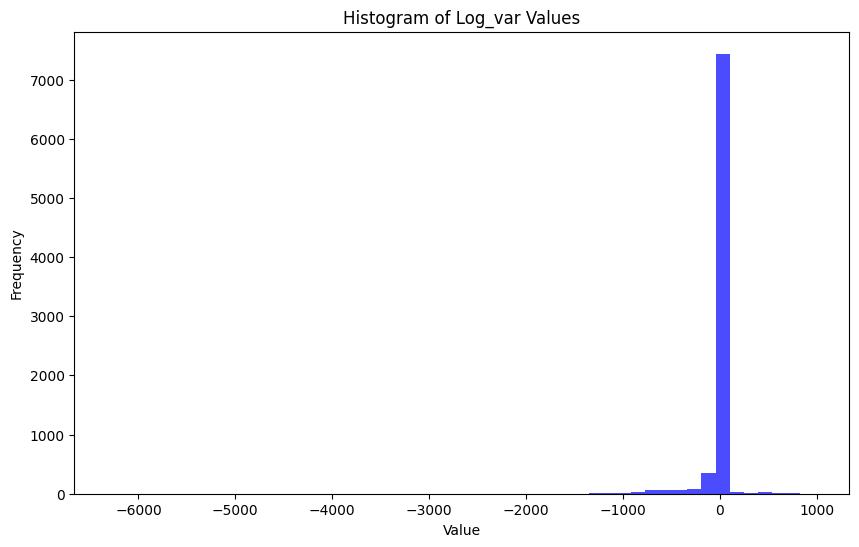

In [54]:
import torch
import matplotlib.pyplot as plt

# Step 2: Extract the tensor you want to visualize
# For example, let's say you want to visualize all the pixel values in the batch
tensor_to_visualize = batch["log_var"]  # This could be batch[0], or any specific tensor in the batch

# Step 3: Convert to NumPy and flatten
tensor_np = tensor_to_visualize.detach().cpu().numpy().flatten()

# Step 4: Plot the histogram
plt.figure(figsize=(10, 6))
plt.hist(tensor_np, bins=50, color='blue', alpha=0.7)
plt.title("Histogram of Log_var Values")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.show()

In [12]:
# Check for very close to 0
import torch

# Example tensor
tensor = batch['log_var']

# Define the threshold
threshold = 1e-3

# Check if there are any elements smaller than the threshold
close_to_zero = (tensor.abs() < threshold).any()

print("Are there any elements close to zero?", close_to_zero)

# Find the indices of elements close to zero
if close_to_zero:
    close_to_zero_indices = torch.nonzero(tensor.abs() < threshold, as_tuple=True)
    print("Indices of elements close to zero:", close_to_zero_indices)

Are there any elements close to zero? tensor(True, device='cuda:0')
Indices of elements close to zero: (tensor([ 4,  7, 19], device='cuda:0'), tensor([223, 160,  53], device='cuda:0'))


In [4]:
import torch
torch.min(batch["z"])

tensor(-inf, device='cuda:0', grad_fn=<MinBackward1>)

In [14]:
import torch
torch.set_printoptions(threshold=20_000)
print(batch["pred_"])

tensor([[1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
      